<a href="https://colab.research.google.com/github/Harikrishna011/CarInsurance/blob/main/CarInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

insurance_data=pd.read_csv('/content/drive/MyDrive/insurance_claims.csv')

insurance_data.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [3]:
summary_stats=insurance_data.describe(include='all')
missing_values=insurance_data.isnull().sum()
print(missing_values)
print(summary_stats)

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64
        age_of_driver      car_age region  number_of_claims
count     1000.000000  1000.000000   1000       1000.000000
unique            NaN          NaN      3               NaN
top               NaN          NaN  Rural               NaN
freq              NaN          NaN    343               NaN
mean        33.112000     6.673000    NaN          0.675000
std          9.253598     4.377583    NaN          0.822223
min         18.000000     0.000000    NaN          0.000000
25%         25.000000     3.000000    NaN          0.000000
50%         33.000000     6.000000    NaN          0.000000
75%         41.000000    11.000000    NaN          1.000000
max         49.000000    14.000000    NaN          5.000000


<function matplotlib.pyplot.show(close=None, block=None)>

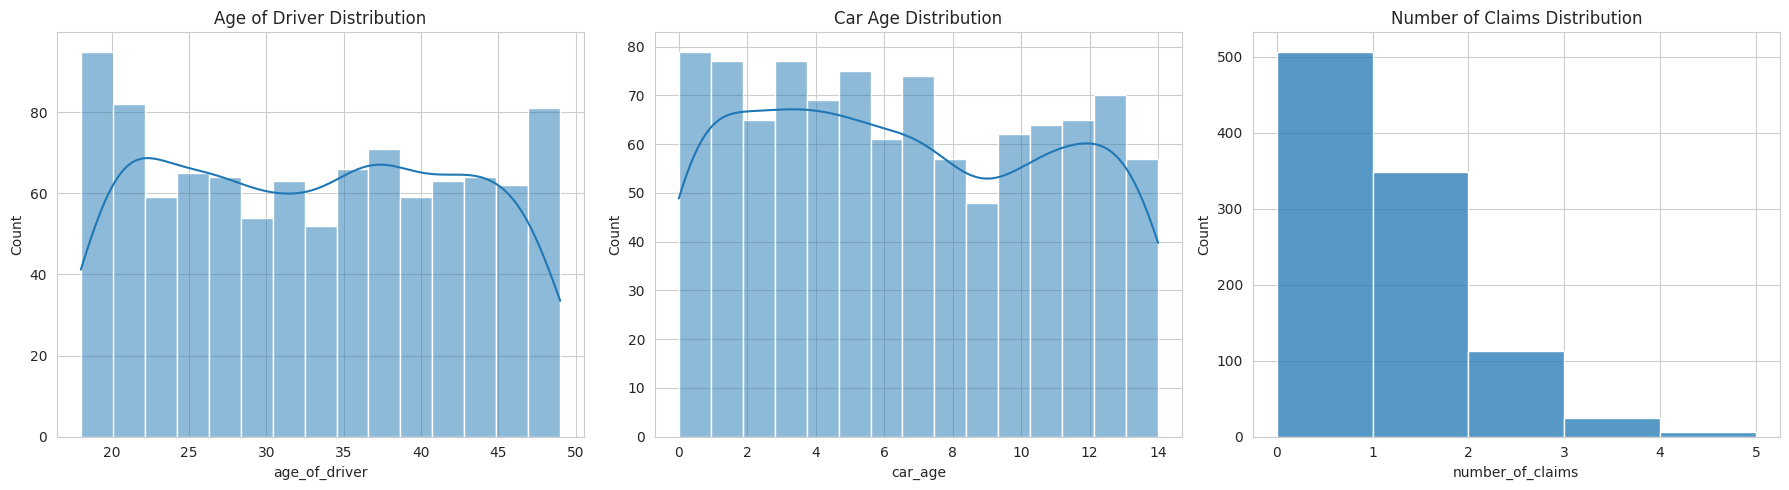

In [6]:
sns.set_style('whitegrid')
fig,ax=plt.subplots(1,3,figsize=(18,5))
sns.histplot(insurance_data['age_of_driver'],kde=True,bins=15,ax=ax[0])
ax[0].set_title('Age of Driver Distribution')
sns.histplot(insurance_data['car_age'],kde=True,bins=15,ax=ax[1])
ax[1].set_title('Car Age Distribution')
sns.histplot(insurance_data['number_of_claims'],kde=False,bins=range(6),ax=ax[2])
ax[2].set_title('Number of Claims Distribution')
plt.tight_layout()
plt.show

In [7]:
from sklearn.model_selection import train_test_split

insuranc_data_encode=pd.get_dummies(insurance_data,columns=['region'],drop_first=True)
train,test=train_test_split(insuranc_data_encode,test_size=0.2,random_state=42)
print(train.head())

     age_of_driver  car_age  number_of_claims  region_Suburban  region_Urban
29              26       13                 1            False         False
535             42        9                 2             True         False
695             44        8                 1            False         False
557             41        3                 1             True         False
836             31       12                 0            False          True


Poisson Regression: Assumes the mean and variance of the count data are equal. Suitable when data does not exhibit overdispersion.
Negative Binomial Regression: More flexible, can handle overdispersion (variance greater than mean) in the count data.


In [16]:
import statsmodels.api as sm
import pandas as pd
X_train = train.drop('number_of_claims', axis=1)
y_train = train['number_of_claims']

X_train = pd.get_dummies(X_train, drop_first=True)


X_train_const = sm.add_constant(X_train)


X_train_const = X_train_const.astype(float)
y_train = y_train.astype(float)

poisson_glm = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
print(poisson_glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       number_of_claims   No. Observations:                  800
Model:                            GLM   Df Residuals:                      795
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.44
Date:                Tue, 06 May 2025   Deviance:                       829.41
Time:                        04:04:07   Pearson chi2:                     770.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02749
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0906      0.181     